<a href="https://www.kaggle.com/code/zaldiego/mushroom-classification-decision-tree?scriptVersionId=107889599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

For each exercise first of all we must test each model with various algorithm, in this case I didn't it and just pick the DecisionTreeClassifier for the explanation of this exercise for classification of 'edible' or 'poisonous' mushrooms :)

In this code you will find all the brief explanation of the solution using a Decission tree. The correct answer for this model is using OneHotEncoder for NO ORDINAL data or (X), and LabelEncoder for ordinal data or (Y). Also, if you don't use correctly this encoding functions you will not get the real result of this excercise or get overfitting errors. 

I don't stop in the visualization and preprocessing techniques, I prefer show the complete code with the result. Well, said and done. First of all we'll import the data and libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# We need to assign only the relevant columns to our dataframe:
relevant_col_names = ['class', 'cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-attachment',
             'gill-spacing', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
             'spore-print-color','habitat']

# Load of our 'dataset' to this model, for the algorithm of Decission tree (classifier)
dataset = pd.read_csv('../input/mushroom-classification/mushrooms.csv',
                      header=None, names=relevant_col_names)

Like I said before, the data must be an integer type for the understanding of our Decission tree. Due this reason, we must use 'OneHotEncoder' to "X", this is when we have to codificate more than 2 variables and these are NOT ORDINAL we must use OneHotEncoder. 

While to'Y' we'll use 'LabelEncoder, due toxity potential of the mushrooms (dataset['class']) that is, this kind of data is scalable therefore ORDINAL, is useful when we have only two possibles answer, 1 and 0, yes or no, or in this case 'ediable' and 'poissonous', as well can be used for ORDINAL data like good, well, bad, very bad, and so on...



In [2]:
# The codification of the data is just calling 'fit_transform' to 'X' and 'Y' respectively
ohe = OneHotEncoder()
X = ohe.fit_transform(dataset.drop(columns=['class'])) #All 'dataset' data, except class

lab_enc = LabelEncoder() 
Y = lab_enc.fit_transform(dataset.loc[:, 'class']) #Just class data of the 'dataset'

# Splitting the data for processing of our Decission tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

Once we've splitted the data we call the algorithm, in this case a decision tree classifier. For better practice is necessary to use a grid search to find the better hiperparameters for our classifier, in this case I just pick values for the parameters of the tree, so for improvement of this model please use a grid search method to find more accurate parameters.

In [3]:
# Max_depth must be the quantity of columns of 'X' due it references the training
# parameters to relacionate with toxicity potential, that is 'Y' data.

tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=0)
tree_gini.fit(X_train, Y_train)

Y_pred = tree_gini.predict(X_test)

And then of course we need to evaluate our model

[[1401   38]
 [   0 1811]]
Score of the model:  0.9883076923076923
Training set score:  0.9881025641025641
Test set score:  0.9883076923076923
ROC AUC score:  0.9867963863794302


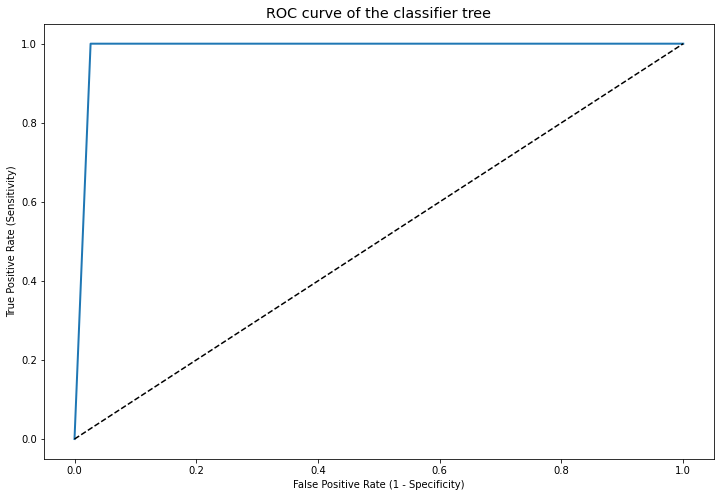

In [4]:
ac = accuracy_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

#Confussion_Matrix, Score, Overfitting y underfitting
print(cm)
print('Score of the model: ', ac)
print('Training set score: ', tree_gini.score(X_train, Y_train))
print('Test set score: ', tree_gini.score(X_test, Y_test))

# Compute ROC-AUC
RocAuc = roc_auc_score(Y_test, Y_pred)
print('ROC AUC score: ', RocAuc)

# Graphic of the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=2)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve of the classifier tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

As you can see, theres no underfitting or overfitting because the result of the test and train accuracy is pretty similar And visualize the model, I know of graphviz is better but, this two lines code is pretty simple to see how look a decision tree :)

[Text(0.8125, 0.9615384615384616, 'X[49] <= 0.5\ngini = 0.489\nsamples = 4875\nvalue = [2077, 1, 2797]'),
 Text(0.75, 0.8846153846153846, 'X[44] <= 0.5\ngini = 0.436\nsamples = 4121\nvalue = [1323, 1, 2797]'),
 Text(0.625, 0.8076923076923077, 'X[59] <= 0.5\ngini = 0.005\nsamples = 385\nvalue = [384, 1, 0]'),
 Text(0.5625, 0.7307692307692307, 'gini = 0.0\nsamples = 384\nvalue = [384, 0, 0]'),
 Text(0.6875, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.8076923076923077, 'X[2] <= 0.5\ngini = 0.376\nsamples = 3736\nvalue = [939, 0, 2797]'),
 Text(0.8125, 0.7307692307692307, 'X[15] <= 0.5\ngini = 0.302\nsamples = 3433\nvalue = [636, 0, 2797]'),
 Text(0.75, 0.6538461538461539, 'X[31] <= 0.5\ngini = 0.262\nsamples = 3310\nvalue = [513, 0, 2797]'),
 Text(0.6875, 0.5769230769230769, 'X[76] <= 0.5\ngini = 0.221\nsamples = 3202\nvalue = [405, 0, 2797]'),
 Text(0.5625, 0.5, 'X[30] <= 0.5\ngini = 0.16\nsamples = 2968\nvalue = [260, 0, 2708]'),
 Text(0.5, 0.423076

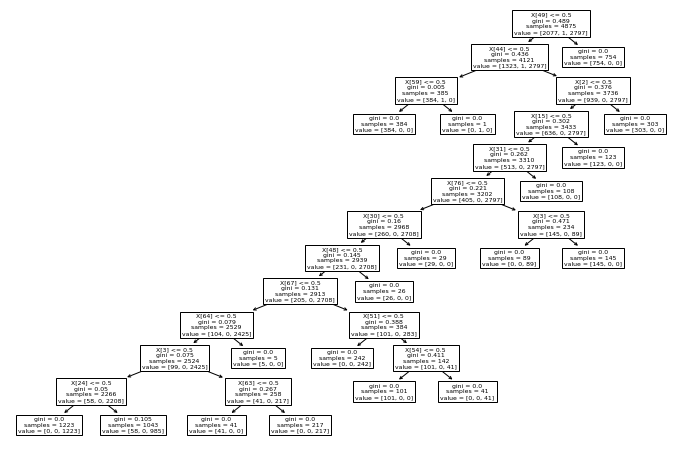

In [5]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_gini.fit(X_train, Y_train))